In [11]:
import requests

DEFAULT_API_URL = "https://agents-course-unit4-scoring.hf.space"
api_url = DEFAULT_API_URL
questions_url = f"{api_url}/questions"

response = requests.get(questions_url, timeout=15)
response.raise_for_status()
questions_data = response.json()
questions_df = pd.DataFrame(questions_data)

In [90]:
import pandas as pd

gaia_bench_1 = pd.read_json('gaia_bench_1_test.jsonl', lines=True)
gaia_bench_1

,task_id,question,Level,file_name,Final answer
0,8e867cd7-cff9-4e6c-867a-ff5ddc2550be,How many studio albums were published by Merce...,1,,3
1,a1e91b78-d3d8-4675-bb8d-62741b4b68a6,In the video https://www.youtube.com/watch?v=L...,1,,3
2,2d83110e-a098-4ebb-9987-066c06fa42d0,".rewsna eht sa ""tfel"" drow eht fo etisoppo eht...",1,,Right
3,cca530fc-4052-43b2-b130-b30968d8aa44,Review the chess position provided in the imag...,1,cca530fc-4052-43b2-b130-b30968d8aa44.png,Rd5
4,4fc2f1ae-8625-45b5-ab34-ad4433bc21f8,Who nominated the only Featured Article on Eng...,1,,FunkMonk
5,6f37996b-2ac7-44b0-8e68-6d28256631b4,"Given this table defining * on the set S = {a,...",1,,"b, e"
6,9d191bce-651d-4746-be2d-7ef8ecadb9c2,Examine the video at https://www.youtube.com/w...,1,,Extremely
7,cabe07ed-9eca-40ea-8ead-410ef5e83f91,What is the surname of the equine veterinarian...,1,,Louvrier
8,3cef3a44-215e-4aed-8e3b-b1e3f08063b7,"I'm making a grocery list for my mom, but she'...",1,,"broccoli, celery, fresh basil, lettuce, sweet ..."
9,99c9cc74-fdc8-46c6-8f8d-3ce2d3bfeea3,"Hi, I'm making a pie but I could use some help...",1,99c9cc74-fdc8-46c6-8f8d-3ce2d3bfeea3.mp3,"cornstarch, freshly squeezed lemon juice, gran..."


In [88]:
gaia_bench_1.iloc[1]['Annotator Metadata']

{'Steps': '1. I did a search for Mercedes Sosa\n2. I went to the Wikipedia page for her\n3. I scrolled down to "Studio albums"\n4. I counted the ones between 2000 and 2009',
 'Number of steps': '4',
 'How long did this take?': '5 minutes',
 'Tools': '1. web browser\n2. google search',
 'Number of tools': '2'}

In [ ]:
# gaia_bench_1.to_json("gaia_bench_1.jsonl", orient='records', lines=True)

In [89]:
from dotenv import load_dotenv

load_dotenv()

True

In [90]:
import os
from dotenv import load_dotenv
from typing import List, Dict, Any, Optional
import tempfile
import re
import json
import requests
from urllib.parse import urlparse
from PIL import Image, ImageDraw, ImageFont, ImageEnhance, ImageFilter
import cmath
import pandas as pd
import uuid
import numpy as np
import logging

"""Langraph"""
from langgraph.graph import START, END, StateGraph, MessagesState
from langchain_core.messages import SystemMessage, HumanMessage

from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_community.tools import DuckDuckGoSearchResults
from langchain_community.document_loaders import WikipediaLoader
from langchain_community.document_loaders import ArxivLoader
from langgraph.prebuilt import ToolNode, tools_condition
from langchain_core.tools import tool

from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_ollama import ChatOllama
from langchain_groq import ChatGroq
from langchain_together import ChatTogether
from langchain_huggingface import (
    ChatHuggingFace,
    HuggingFaceEndpoint,
    HuggingFaceEmbeddings,
)

import logging

In [ ]:
# import os
# from langchain_together import ChatTogether

# llm = ChatTogether(model="meta-llama/Llama-3.3-70B-Instruct-Turbo")

# # Define a tool
# def multiply(a: int, b: int) -> int:
#     return a * b

# # Augment the LLM with tools
# llm_with_tools = llm.bind_tools([multiply])

# # Invoke the LLM with input that triggers the tool call
# msg = llm_with_tools.invoke("What is 2 times 3?")

# # Get the tool call
# msg.tool_calls

[{'name': 'multiply',
  'args': {'a': 2, 'b': 3},
  'id': 'call_gt4117rcu8e447ygica99xzi',
  'type': 'tool_call'}]

In [ ]:
# # Querying chat models with Together AI

# from langchain_together import ChatTogether

# # choose from our 50+ models here: https://docs.together.ai/docs/inference-models
# chat = ChatTogether(
#     # together_api_key="YOUR_API_KEY",
#     model="Qwen/QwQ-32B",
#     max_tokens=None,
#     temperature=0,
#     timeout=None,
#     max_retries=2,
# )

# # stream the response back from the model
# # for m in chat.stream(gaia_bench_1.iloc[0].Question):
# #     print(m.content, end="", flush=True)

# tools = [
#     calculator,
#     wiki_search,
#     web_search,
#     reverse_string,
# ]

# with open("system_prompt_short.txt", "r", encoding="utf-8") as f:
#     system_message = f.read()
# # print(system_prompt)

# question = gaia_bench_1.iloc[0].Question
# initial_state = {
#     'system_message': system_message,
#     'question': question,
# }

# messages = [
#     (
#         "system",
#         {initial_state['system_message']},
#     ),
#     ("human", {initial_state['question']}),
# ]

# print(initial_state['system_message'])
# print(initial_state['question'])

# chat_with_tools = chat.bind_tools(tools)
# response = chat_with_tools.invoke(messages)
# # if you don't want to do streaming, you can use the invoke method
# # chat.invoke(gaia_bench_1.iloc[0].Question)
# print(response.content)

You are a helpful assistant tasked with answering questions using a set of tools.
Your final answer for my question must strictly follow this format:
FINAL ANSWER: [ANSWER]
Your answer should only start with "FINAL ANSWER: ", followed by the answer. 
Write the answer in that exact format.
If Eliud Kipchoge could maintain his record-making marathon pace indefinitely, how many thousand hours would it take him to run the distance between the Earth and the Moon its closest approach? Please use the minimum perigee value on the Wikipedia page for the Moon when carrying out your calculation. Round your result to the nearest 1000 hours and do not use any comma separators if necessary.



: 

In [ ]:
# response.tool_calls

[{'name': 'wiki_search',
  'args': {'query': 'Moon minimum perigee'},
  'id': 'call_k7cm64w9l3r6xdh6xj9730el',
  'type': 'tool_call'},
 {'name': 'calculator',
  'args': {'expression': '362600 / 20.88'},
  'id': 'call_tylbx4uc9j56lojmc7elukka',
  'type': 'tool_call'},
 {'name': 'calculator',
  'args': {'expression': '17366.0 rounded to nearest 1000'},
  'id': 'call_i18xsfsyx07qw8eh9j7j750n',
  'type': 'tool_call'}]

## Tools

In [8]:
# @tool
# def web_search(query: str) -> str:
#     """Search Tavily for a query and return maximum 3 results.
#     Args:
#         query: The search query."""
#     search_docs = TavilySearchResults(max_results=3).invoke(query)
#     formatted_search_docs = "\n\n---\n\n".join(
#         [
#             f'<Document source="{doc.get("url", "")}" title="{doc.get("title", "")}"/>\n{doc.get("content", "")}\n</Document>'
#             for doc in search_docs
#         ]
#     )
#     return {"web_results": formatted_search_docs}

In [ ]:
@tool
def web_search(query: str) -> dict:
    """Search DDGS for a query and return maximum 3 results.
    Args:
        query: The search query."""
    search_docs = DuckDuckGoSearchResults(max_results=3, output_format='list').invoke(query)
    # return search_docs
    formatted_search_docs = "\n\n---\n\n".join(
        [
            f'<Document source="{doc.get("link", "")}" title="{doc.get("title", "")}"/>\n{doc.get("snippet", "")}\n</Document>'
            for doc in search_docs
        ]
    )
    return {"web_results": formatted_search_docs}

@tool
def wiki_search(query: str) -> dict:
    """Search Wikipedia for a query and return maximum 2 results.
    
    Args:
        query: The search query."""
    search_docs = WikipediaLoader(query=query, load_max_docs=3).load_and_split()
    formatted_search_docs = "\n\n---\n\n".join(
        [
            f'<Document source="{doc.metadata["source"]}" page="{doc.metadata.get("page", "")}"/>\n{doc.page_content}\n</Document>'
            for doc in search_docs
        ])
    return {"wiki_results": formatted_search_docs}

@tool
def reverse_string(query: str) -> dict:
    """Reverse the input string.
    
    Args:
        query: The input string to reverse."""
    return {"reversed_string": query[::-1]}

In [ ]:
# from langchain_community.document_loaders import WikipediaLoader


# query = 'Mercedes Sosa discography'

# search_docs = WikipediaLoader(query=query, load_max_docs=2, doc_content_chars_max=10000).load_and_split()
# # formatted_search_docs = "\n\n---\n\n".join(
# #     [
# #         f'<Document source="{doc.metadata["source"]}" page="{doc.metadata.get("page", "")}"/>\n{doc.page_content}\n</Document>'
# #         for doc in search_docs
# #     ])

In [ ]:
# print(search_docs[2].page_content)

== Awards ==
Sosa won the Latin Grammy Award for Best Folk Album in 2000 (Misa Criolla), 2003 (Acústico), 2006 (Corazón Libre), 2009 (Cantora 1, which also won Best Recording Package and was nominated for Album of the Year), and 2011 (Deja La Vida Volar), as well as several international awards.
In 1995, Konex Foundation from Argentina granted her the Diamond Konex Award, one of the most prestigious awards in Argentina, as the most important personality in the popular music of her country in the last decade.


== Death ==

Suffering from recurrent endocrine and respiratory problems in later years, the 74-year-old Sosa was hospitalized in Buenos Aires on 18 September 2009. She died from multiple organ failure on 4 October 2009, at 5:15 am. She was survived by one son, Fabián Matus (d. 15 March 2019), born of her first marriage. He said: "She lived her 74 years to the fullest. She had done practically everything she wanted, she didn't have any type of barrier or any type of fear that lim

In [ ]:
@tool
def calculator(expression: str) -> str:
    """Perform mathematical calculations and return the result.
    
    This calculator can handle:
    - Basic arithmetic: +, -, *, /, % (modulus)
    - Parentheses for order of operations
    - Decimal numbers
    - Multiple operations in one expression
    
    Args:
        expression: A mathematical expression as a string
    
    Returns:
        A string containing the calculation result
    
    Examples:
        calculator("25 * 4") -> "100"
        calculator("100 / 5") -> "20.0"
        calculator("(15 + 30) * 2") -> "90"
        calculator("50 - 20 + 10") -> "40"
        calculator("17 % 5") -> "2"
        calculator("100 % 7") -> "2"
        calculator("(20 + 5) % 8") -> "5"
    """
    try:
        # Clean the expression
        expression = expression.strip()
        
        # Validate that the expression only contains safe characters (now including %)
        allowed_chars = set('0123456789+-*/.()% ')
        if not all(c in allowed_chars for c in expression):
            raise ValueError("Expression contains invalid characters. Only numbers and +, -, *, /, %, (, ) are allowed.")
        
        result = eval(expression)
        
        # Format the result
        if isinstance(result, float) and result.is_integer():
            return str(int(result))
        else:
            return str(result)
            
    except ZeroDivisionError:
        return "Error: Cannot divide by zero or modulus by zero"
    except SyntaxError:
        return f"Error: Invalid mathematical expression: {expression}"
    except Exception as e:
        return f"Error: {str(e)}"

NameError: name 'tool' is not defined

## Agent States

In [93]:
from typing import Optional
from langgraph.graph import MessagesState

# Define the state type with annotations
class AgentState(MessagesState):
    system_message: str
    last_ai_message: str
    question: str
    final_answer: str
    ready_to_answer: bool
    error: Optional[str]

## Model

In [94]:
def init_model():
    # llm = ChatOllama(
    #     model="llama3.2",
    #     # model="qwen3",
    #     # model="qwen3:4b",
    #     temperature=0,
    # )

    # llm = ChatTogether(
    #     model="openai/gpt-oss-20b",
    #     temperature=0,
    # )

    # llm = ChatTogether(
    #     # together_api_key="YOUR_API_KEY",
    #     model="openai/gpt-oss-120b",
    #     max_tokens=None,
    #     temperature=0,
    #     timeout=None,
    #     max_retries=2,
    # )

    # llm = ChatTogether(
    #     # together_api_key="YOUR_API_KEY",
    #     model="meta-llama/Meta-Llama-3-8B-Instruct-Lite",
    #     max_tokens=None,
    #     temperature=0,
    #     timeout=None,
    #     max_retries=2,
    # )
   
    # llm = ChatTogether(
    #     # together_api_key="YOUR_API_KEY",
    #     model="Qwen/Qwen2.5-7B-Instruct-Turbo",
    #     max_tokens=None,
    #     temperature=0,
    #     timeout=None,
    #     max_retries=2,
    # )
    llm = ChatTogether(
        # together_api_key="YOUR_API_KEY",
        model="Qwen/QwQ-32B",
        max_tokens=None,
        temperature=0,
        timeout=None,
        max_retries=2,
    )   

    return llm

## Nodes

In [95]:
tools = [
    calculator,
    wiki_search,
    web_search,
    reverse_string,
]

# Assistant node - generates responses
def assistant(state: AgentState):
    """Generate a response using the LLM."""

    llm = ChatOllama(
        # model="llama3.2",
        model="qwen3",
        # model="qwen3:4b",
        temperature=0,
        num_ctx=16384,
    )

    # llm = init_model()

    messages = []
    init = False
    if len(state["messages"]) == 0:
        messages = [
            SystemMessage(content=state["system_message"]),
            HumanMessage(content=state["question"]),
        ]
        init = True
        for m in messages:
            m.pretty_print()

    # Bind tools to the LLM
    chat_with_tools = llm.bind_tools(tools)
    response = chat_with_tools.invoke(messages if init else state["messages"])
    messages.append(response)
    # print(response)
    messages[-1].pretty_print()
    # print(f"Assistant response: {response.content[:50]}...")
    return {
        "messages": messages,
        "last_ai_message": response.content,  # if state["messages"] and isinstance(state["messages"][-1], AIMessage) else None
    }

In [97]:
from langchain_core.output_parsers import JsonOutputParser
from langchain_core.prompts import PromptTemplate
from langchain_core.messages import AIMessage
from pydantic import BaseModel, Field

# Define your desired data structure.
class AnswerTemplate(BaseModel):
    final_answer: str = Field(description="Final answer to the question")


def validate_answer(state: AgentState):
    """Validate the final answer."""
    llm = ChatOllama(
        model="llama3.2",
        # model="qwen3",
        # model="qwen3:4b",
        temperature=0,
        num_ctx=8192,
    )

    # llm = init_model()

    def escape_braces(text):
        return text.replace("{", "{{").replace("}", "}}")

    query = "---\n\nYou are given a conversation between a human and an AI agent. Identify the final answer provided by the agent. Then, format that final answer according to the formatting rules described in the system message, but do not alter the content of the answer itself. Only apply formatting as instructed. Answer in JSON format."

    # Set up a parser + inject instructions into the prompt template.
    '''
        Создаётся парсер, который преобразует ответ модели в JSON-структуру, соответствующую AnswerTemplate (предположительно, это Pydantic-модель с полем final_answer).
        https://python.langchain.com/docs/how_to/output_parser_json/
    '''
    parser = JsonOutputParser(pydantic_object=AnswerTemplate)
    prompt = PromptTemplate(
        template=(
            f"SYSTEM MESSAGE: {state['system_message']}\n\n"
            f"HUMAN QUERY: {escape_braces(state['question'])}\n\n"
            f"AGENT ANSWER: {escape_braces(state['last_ai_message'])}\n\n"
            f"{query}\n\n"
            "{format_instructions}"
        ),
        input_variables=["query"],
        partial_variables={"format_instructions": parser.get_format_instructions()},
    )
    # print(prompt)
    chain = prompt | llm | parser
    # final_answer = chain.invoke(
    #     {"format_instructions": parser.get_format_instructions()}
    # )
    final_answer = chain.invoke({"query": query})
    print(final_answer)
    final_answer = final_answer["final_answer"]
    # logger.info(f"Final answer: {final_answer}")
    return {"final_answer": final_answer}

In [106]:
from langchain_core.output_parsers import JsonOutputParser
from langchain_core.prompts import PromptTemplate
from langchain_core.messages import AIMessage
from pydantic import BaseModel, Field

# Define your desired data structure.
class AnswerTemplate(BaseModel):
    final_answer: str = Field(description="Final answer to the question")


def validate_answer(state: AgentState):
    """Validate the final answer."""
    llm = ChatOllama(
        model="llama3.2",
        # model="qwen3",
        # model="qwen3:4b",
        temperature=0,
        num_ctx=8192,
        format=AnswerTemplate.model_json_schema(),
    )

    # llm = init_model()

    def escape_braces(text):
        return text.replace("{", "{{").replace("}", "}}")

    query = "---\n\nYou are given a conversation between a human and an AI agent. Identify the final answer provided by the agent. Then, format that final answer according to the formatting rules described in the system message, but do not alter the content of the answer itself. Only apply formatting as instructed. Answer in JSON format."

    # Set up a parser + inject instructions into the prompt template.
    '''
        Создаётся парсер, который преобразует ответ модели в JSON-структуру, соответствующую AnswerTemplate (предположительно, это Pydantic-модель с полем final_answer).
        https://python.langchain.com/docs/how_to/output_parser_json/
    '''
   
    prompt = PromptTemplate(
        template=(
            f"SYSTEM MESSAGE: {state['system_message']}\n\n"
            f"HUMAN QUERY: {escape_braces(state['question'])}\n\n"
            f"AGENT ANSWER: {escape_braces(state['last_ai_message'])}\n\n"
            f"{query}\n\n"
        ),
        input_variables=["query"],
    )
    chain = prompt | llm
    final_answer = chain.invoke({"query": query})
    final_answer = AnswerTemplate.model_validate_json(final_answer.content)

    print(final_answer)
    # final_answer = final_answer["final_answer"]
    final_answer = final_answer.final_answer

    # logger.info(f"Final answer: {final_answer}")
    return {"final_answer": final_answer}

In [99]:
def ready_to_answer(state: AgentState):
    if state["ready_to_answer"]:
        return "validate_answer"
    else:
        return "assistant"

## JSON output example

In [ ]:
# from langchain_core.output_parsers import JsonOutputParser
# from langchain_core.prompts import PromptTemplate
# from pydantic import BaseModel, Field

# # model = ChatOllama(
# #         model="llama3.2",
# #         # model="qwen3",
# #         # model="qwen3:4b",
# #         temperature=0,
# #     )
# model = init_model()

# # Define your desired data structure.
# class Joke(BaseModel):
#     setup: str = Field(description="question to set up a joke")
#     punchline: str = Field(description="answer to resolve the joke")


# # And a query intented to prompt a language model to populate the data structure.
# joke_query = "Tell me a joke."

# # Set up a parser + inject instructions into the prompt template.
# parser = JsonOutputParser(pydantic_object=Joke)

# prompt = PromptTemplate(
#     template="Answer the user query.\n{format_instructions}\n{query}\n",
#     input_variables=["query"],
#     partial_variables={"format_instructions": parser.get_format_instructions()},
# )

# chain = prompt | model | parser

# chain.invoke({"query": joke_query})

OutputParserException: Invalid json output: <think>
Okay, the user wants a joke. Let me think of a classic setup and punchline. How about a pun-based joke? Maybe something with animals. Oh, I remember one about a dog in a bakery. Wait, let me structure it properly. The setup needs to pose a question or scenario, and the punchline delivers the surprise. Let me check the schema again. They need "setup" and "punchline" as strings. Alright, here's an idea: "Why didn't the skeleton ever go to the party? Because he had no body to dance with!" That's a common one but works. Let me make sure it fits the schema. Yep, both parts are strings. No markdown, just JSON. Okay, ready.
</think>

{
  "setup": "Why didn't the skeleton ever go to the party?",
  "punchline": "Because he had no body to dance with!"
}
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/OUTPUT_PARSING_FAILURE 

In [ ]:
# print(parser.get_format_instructions())

The output should be formatted as a JSON instance that conforms to the JSON schema below.

As an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}
the object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.

Here is the output schema:
```
{"properties": {"setup": {"description": "question to set up a joke", "title": "Setup", "type": "string"}, "punchline": {"description": "answer to resolve the joke", "title": "Punchline", "type": "string"}}, "required": ["setup", "punchline"]}
```


: 

## Graph

In [101]:
# Build graph function
def build_graph():
    """Build the graph"""
    builder = StateGraph(AgentState)
    builder.add_node("assistant", assistant)
    builder.add_node("tools", ToolNode(tools))
    builder.add_node("validate_answer", validate_answer)

    builder.add_edge(START, "assistant")
    builder.add_conditional_edges(
        "assistant",
        tools_condition,
        {
            "tools": "tools",  # Route to tools if needed
            # END: "END"  # Route to end if no tools needed
            END: "validate_answer",  # Route to validate_answer if no tools needed
        },
    )
    builder.add_edge("tools", "assistant")
    # builder.add_edge("assistant", "validate_answer")
    # builder.add_conditional_edges(
    #     "assistant",
    #     ready_to_answer,
    #     {"validate_answer": "validate_answer"},
    # )
    builder.add_edge("validate_answer", END)

    return builder.compile()

## Show graph

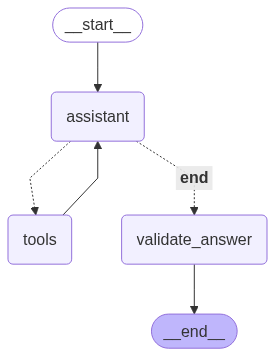

In [107]:
# Visualize your graph
from IPython.display import Image, display
graph = build_graph()
png = graph.get_graph().draw_mermaid_png()

display(Image(png))

## Run sample

In [108]:
logger = logging.getLogger(__name__)

In [109]:
gaia_bench_1.iloc[8].Question

'.rewsna eht sa "tfel" drow eht fo etisoppo eht etirw ,ecnetnes siht dnatsrednu uoy fI'

In [110]:
with open("system_prompt_short.txt", "r", encoding="utf-8") as f:
    system_message = f.read()
# print(system_prompt)

question = gaia_bench_1.iloc[1].Question
initial_state = {
    'system_message': system_message,
    'question': question,
}

final_state = graph.invoke(initial_state)
final_answer = final_state.get("final_answer", None)
print(final_answer)

================================ System Message ================================

You are a helpful assistant tasked with answering questions using a set of tools.
Your final answer for my question must strictly follow this format:
FINAL ANSWER: [ANSWER]
Your answer should only start with "FINAL ANSWER: ", followed by the answer. 
Write the answer in that exact format.
================================ Human Message =================================

How many studio albums were published by Mercedes Sosa between 2000 and 2009 (included)? You can use the latest 2022 version of english wikipedia.
================================== Ai Message ==================================

<think>
Okay, let's tackle this question: "How many studio albums were published by Mercedes Sosa between 2000 and 2009 (included)? You can use the latest 2022 version of English Wikipedia."

First, I need to find information about Mercedes Sosa's studio albums released in that specific time frame. Since the user me

In [220]:
final_state

{'messages': [SystemMessage(content='You are a helpful assistant tasked with answering questions using a set of tools.\nYour final answer for my question must strictly follow this format:\nFINAL ANSWER: [ANSWER]\nYour answer should only start with "FINAL ANSWER: ", followed by the answer. \nWrite the answer in that exact format. Do not include any other text. Do not explain anything. \nUse tools only if the current question is different from the similar one.\nExamples:\n- FINAL ANSWER: Monk\n- FINAL ANSWER: Rome\n- FINAL ANSWER: 228\nIf you do not follow this format exactly, your response will be considered incorrect.', additional_kwargs={}, response_metadata={}, id='cca8ea85-212c-4959-bb87-de46361f6ab6'),
  HumanMessage(content='If Eliud Kipchoge could maintain his record-making marathon pace indefinitely, how many thousand hours would it take him to run the distance between the Earth and the Moon its closest approach? Please use the minimum perigee value on the Wikipedia page for the

In [57]:
final_state["messages"][-1].pretty_print()

================================== Ai Message ==================================

FINAL ANSWER: 1500000


In [54]:
for m in final_state["messages"]:
    m.pretty_print()

================================ System Message ================================

You are a helpful assistant tasked with answering questions using a set of tools.
Your final answer for my question must strictly follow this format:
FINAL ANSWER: [ANSWER]
Your answer should only start with "FINAL ANSWER: ", followed by the answer. 
Write the answer in that exact format. Do not include any other text. Do not explain anything. 
Examples:
- FINAL ANSWER: Monk
- FINAL ANSWER: Rome
- FINAL ANSWER: 228
If you do not follow this format exactly, your response will be considered incorrect.
================================ Human Message =================================

If Eliud Kipchoge could maintain his record-making marathon pace indefinitely, how many thousand hours would it take him to run the distance between the Earth and the Moon its closest approach? Please use the minimum perigee value on the Wikipedia page for the Moon when carrying out your calculation. Round your result to the near